In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from skimage.restoration import estimate_sigma
from skimage import feature

In [42]:
# Define paths
first_print_dir = 'First Print'
second_print_dir = 'Second Print'

# Count number of images in each class
num_first = len(os.listdir(first_print_dir))
num_second = len(os.listdir(second_print_dir))

# Print basic statistics
print(f"Number of original QR codes (First prints): {num_first}")
print(f"Number of counterfeit QR codes (Second prints): {num_second}")
print(f"Total number of images: {num_first + num_second}")

Number of original QR codes (First prints): 100
Number of counterfeit QR codes (Second prints): 100
Total number of images: 200


Text(0, 0.5, 'Number of Images')

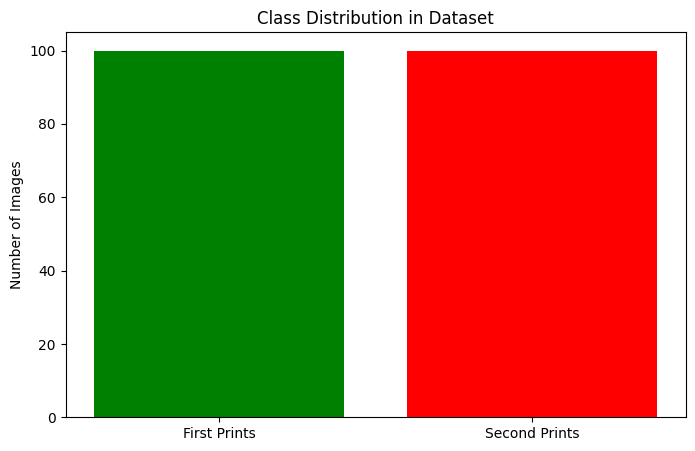

In [43]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
bars = plt.bar(['First Prints', 'Second Prints'], [num_first, num_second], color=['green', 'red'])
plt.title('Class Distribution in Dataset')
plt.ylabel('Number of Images')

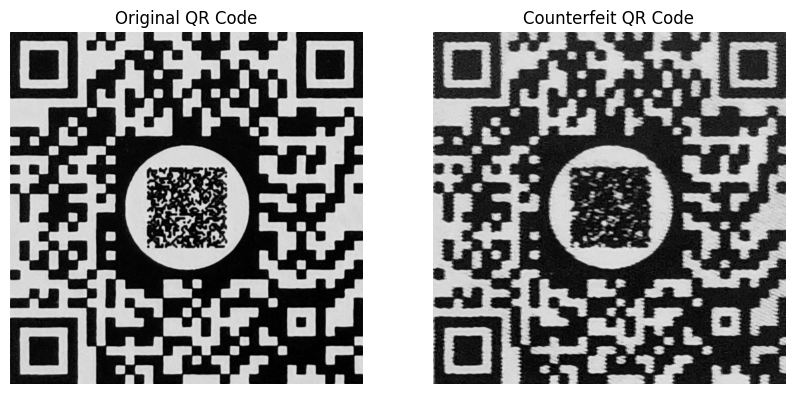

In [44]:
# Load the first image from each category
def load_first_image(folder_path):
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            return image, img_path
    return None, None

original_image, original_image_path = load_first_image("First Print")
counterfeit_image, counterfeit_image_path = load_first_image("Second Print")

# Display the first images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original QR Code")
axes[0].axis("off")

axes[1].imshow(counterfeit_image, cmap='gray')
axes[1].set_title("Counterfeit QR Code")
axes[1].axis("off")

plt.show()


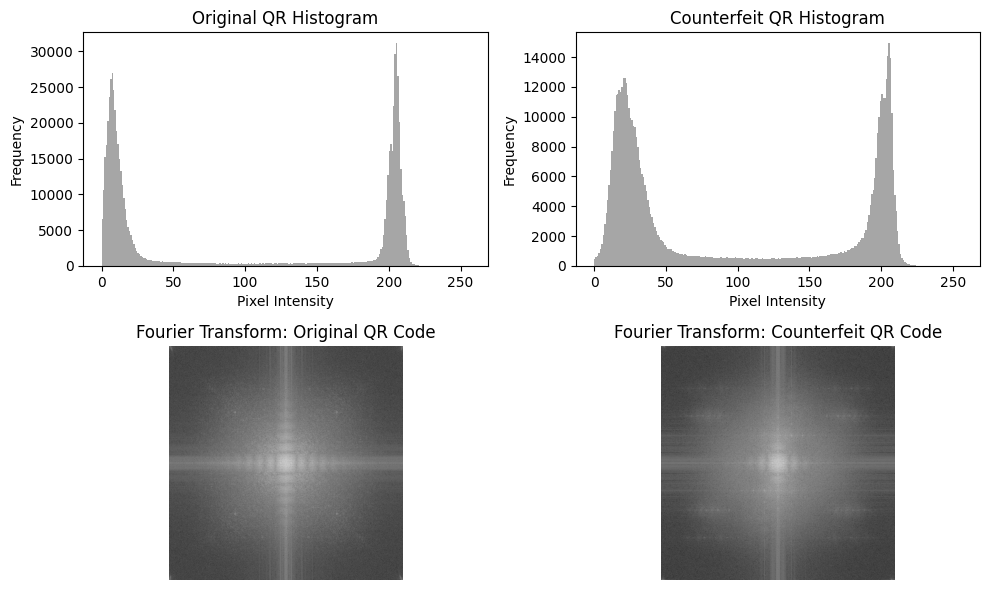

In [45]:
# Global Image properties
# Histogram & Intensity Distribution + Fourier Transform Analysis
fig, axes = plt.subplots(2, 2, figsize=(10,6))

# Histogram for Original QR
axes[0, 0].hist(original_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
axes[0, 0].set_title("Original QR Histogram")
axes[0, 0].set_xlabel("Pixel Intensity")
axes[0, 0].set_ylabel("Frequency")

# Histogram for Counterfeit QR
axes[0, 1].hist(counterfeit_image.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
axes[0, 1].set_title("Counterfeit QR Histogram")
axes[0, 1].set_xlabel("Pixel Intensity")
axes[0, 1].set_ylabel("Frequency")

# Fourier Transform for Original QR
f_transform = np.fft.fft2(original_image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted) + 1)
axes[1, 0].imshow(magnitude_spectrum, cmap='gray')
axes[1, 0].set_title("Fourier Transform: Original QR Code")
axes[1, 0].axis("off")

# Fourier Transform for Counterfeit QR
f_transform = np.fft.fft2(counterfeit_image)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted) + 1)
axes[1, 1].imshow(magnitude_spectrum, cmap='gray')
axes[1, 1].set_title("Fourier Transform: Counterfeit QR Code")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

GLCM Features - Original QR: (np.float64(280.21384362611354), np.float64(6.020780512805053), np.float64(0.43992515373503277))
GLCM Features - Counterfeit QR: (np.float64(142.0850597132396), np.float64(6.245279403209801), np.float64(0.29710929549327536))


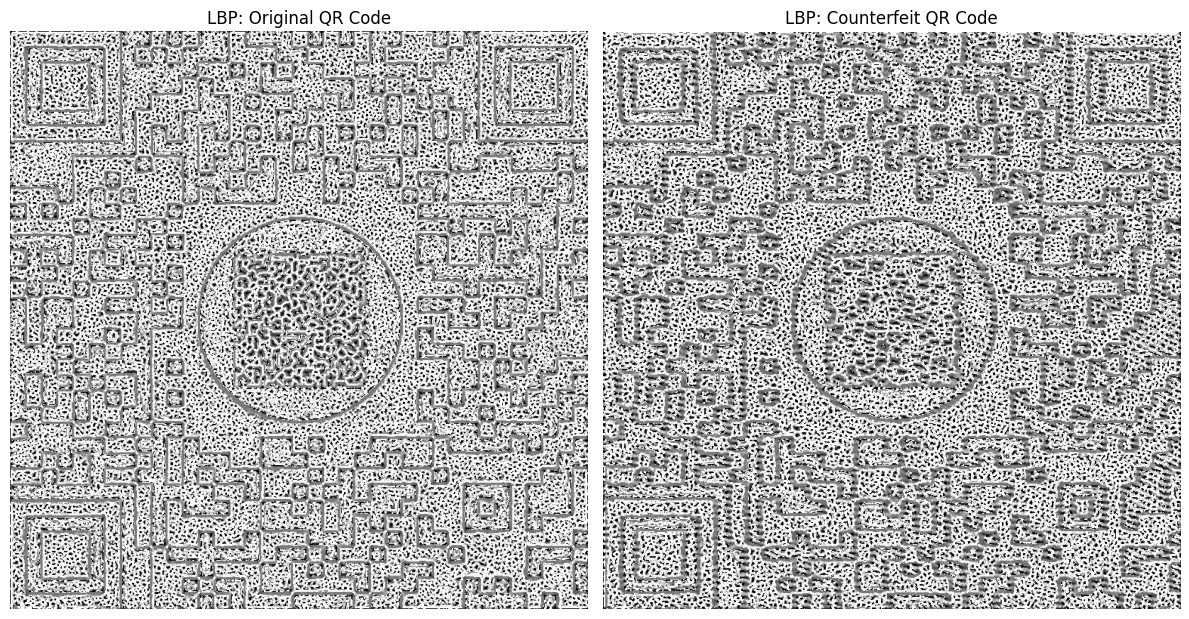

In [ ]:
# Local Image properties
# Local Binary Patterns (LBP) & Haralick Texture Features (GLCM)
radius = 3
n_points = 8 * radius

lbp_original = local_binary_pattern(original_image, n_points, radius, method='uniform')
lbp_counterfeit = local_binary_pattern(counterfeit_image, n_points, radius, method='uniform')

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# LBP for Original QR
axes[0].imshow(lbp_original, cmap='gray')
axes[0].set_title("LBP: Original QR Code")
axes[0].axis("off")

# LBP for Counterfeit QR
axes[1].imshow(lbp_counterfeit, cmap='gray')
axes[1].set_title("LBP: Counterfeit QR Code")
axes[1].axis("off")

# Compute GLCM features
def compute_glcm_features(image):
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    return contrast, dissimilarity, homogeneity

original_glcm_features = compute_glcm_features(original_image)
counterfeit_glcm_features = compute_glcm_features(counterfeit_image)
# Print GLCM features
print("GLCM Features - Original QR:", original_glcm_features)
print("GLCM Features - Counterfeit QR:", counterfeit_glcm_features)

plt.tight_layout()
plt.show()

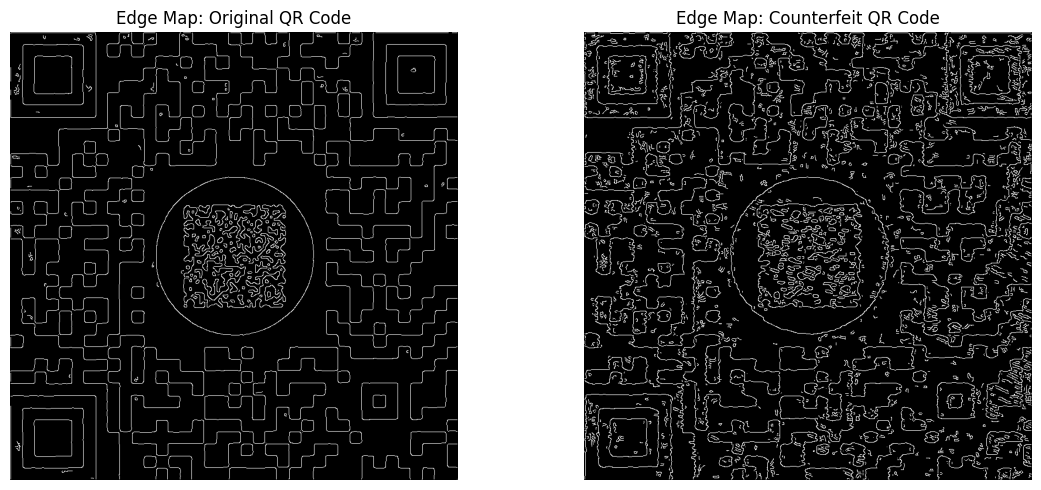

Noise Estimate (Sigma) - Original QR: 0.5741518330064647
Noise Estimate (Sigma) - Counterfeit QR: 0.7976117457756404
Sharpness (Laplacian Variance) - Original QR: 344.0456728266602
Sharpness (Laplacian Variance) - Counterfeit QR: 262.12360080095215


In [55]:
# Print Artifacts & Resolution Differences
# Noise Estimation
sigma_original = estimate_sigma(original_image, channel_axis=None)
sigma_counterfeit = estimate_sigma(counterfeit_image, channel_axis=None)

# Sharpness (Laplacian Variance)
sharpness_original = cv2.Laplacian(original_image, cv2.CV_64F).var()
sharpness_counterfeit = cv2.Laplacian(counterfeit_image, cv2.CV_64F).var()

# Edge Density (Canny Edge Detection)
edges_original = feature.canny(original_image, sigma=1)
edges_counterfeit = feature.canny(counterfeit_image, sigma=1)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Edge Density Comparison
axes[0].imshow(edges_original, cmap='gray')
axes[0].set_title("Edge Map: Original QR Code")
axes[0].axis("off")

axes[1].imshow(edges_counterfeit, cmap='gray')
axes[1].set_title("Edge Map: Counterfeit QR Code")
axes[1].axis("off")

plt.tight_layout()
plt.show()

# Print noise estimates and sharpness
print("Noise Estimate (Sigma) - Original QR:", sigma_original)
print("Noise Estimate (Sigma) - Counterfeit QR:", sigma_counterfeit)
print("Sharpness (Laplacian Variance) - Original QR:", sharpness_original)
print("Sharpness (Laplacian Variance) - Counterfeit QR:", sharpness_counterfeit)

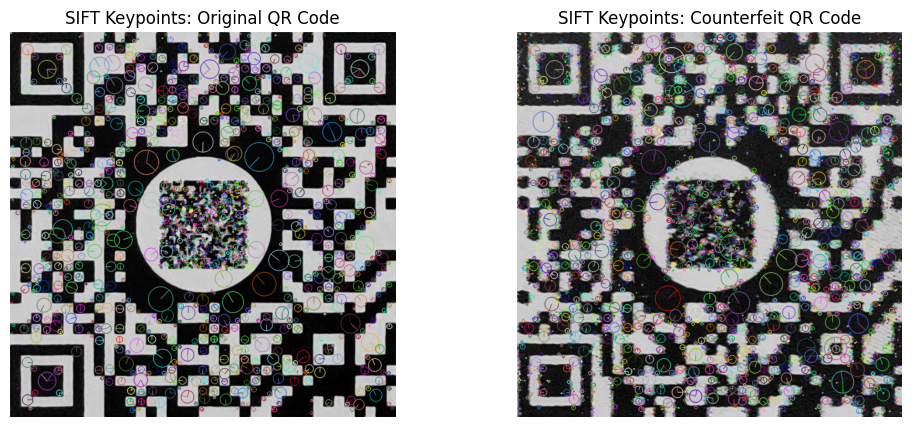

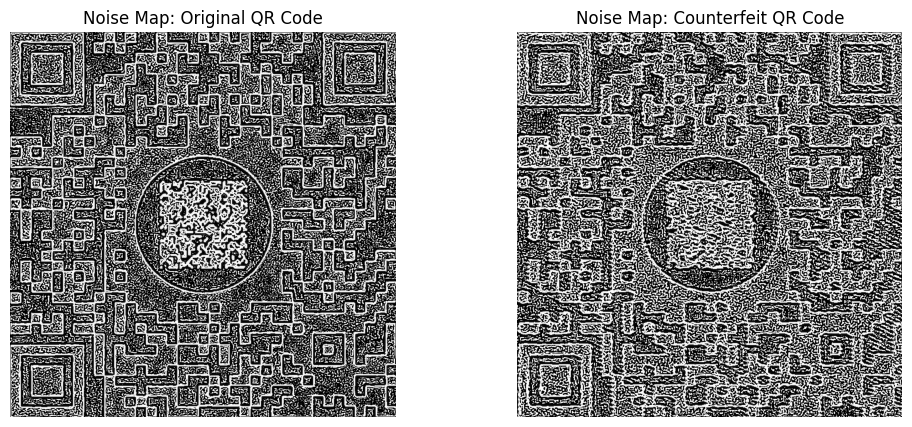

In [56]:
# Copy Detection Pattern (CDP) Degradation
# Microstructure Variations
sift = cv2.SIFT_create()
keypoints_original, descriptors_original = sift.detectAndCompute(original_image, None)
keypoints_counterfeit, descriptors_counterfeit = sift.detectAndCompute(counterfeit_image, None)

# Visualizing Keypoints
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.drawKeypoints(original_image, keypoints_original, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
axes[0].set_title("SIFT Keypoints: Original QR Code")
axes[0].axis("off")

axes[1].imshow(cv2.drawKeypoints(counterfeit_image, keypoints_counterfeit, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
axes[1].set_title("SIFT Keypoints: Counterfeit QR Code")
axes[1].axis("off")

plt.show()

# Random Noise Comparison
noise_original = original_image - cv2.GaussianBlur(original_image, (5,5), 0)
noise_counterfeit = counterfeit_image - cv2.GaussianBlur(counterfeit_image, (5,5), 0)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(noise_original, cmap='gray')
axes[0].set_title("Noise Map: Original QR Code")
axes[0].axis("off")

axes[1].imshow(noise_counterfeit, cmap='gray')
axes[1].set_title("Noise Map: Counterfeit QR Code")
axes[1].axis("off")

plt.show()